In [4]:
import os

import pandas as pd
from sklearn.model_selection import train_test_split

In [30]:
from flare.preprocessing import split_features_target

root = '/home/elichen/TWDS/model-trainer/merged_data'
training_path = os.path.join(root, 'brfss_combine_train_v2_important_20220708.csv')
testing_path = os.path.join(root, 'brfss_combine_test_v2_important_20220708.csv')
training_data = pd.read_csv(training_path)
testing_data = pd.read_csv(testing_path)

training_data.drop(columns=['Unnamed: 0'], inplace=True)
testing_data.drop(columns=['Unnamed: 0'], inplace=True)


X_train, y_train = split_features_target(training_data)
X_test, y_test = split_features_target(testing_data)

In [31]:
from flare.eval import Evaluator

In [32]:
import joblib

model = joblib.load('./models/LGBMClassifier-training-2022-07-20 20:54:57.042775.pkl')

accuracy_score: 0.8508834452489027
precision_score: 0.7751911639762107
recall_score: 0.30084410445792664
f1_score: 0.43346477267328615
fpr: 0.020414461400774606
tpr: 0.30084410445792664


Text(0.5, 1.0, 'Confusion Matrix, prob_threshold: 0.618')

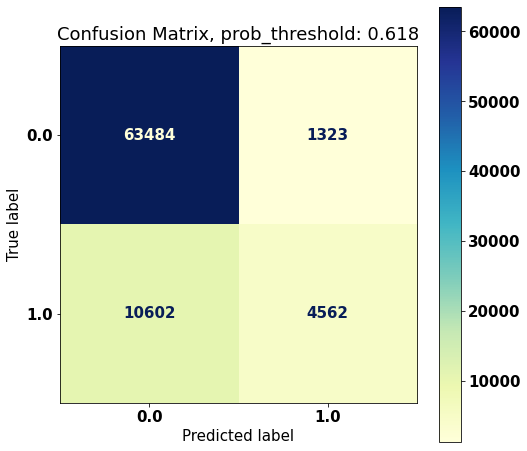

In [149]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
                            ConfusionMatrixDisplay)
import matplotlib.pyplot as plt


threshold = 0.618
evaluator = Evaluator(
                scoring_funcs=(accuracy_score, precision_score, recall_score, f1_score, confusion_matrix),
                prob_threshold=threshold,
)
perf = evaluator.evaluate(model, X_test, y_test)
for pk, pv in perf.items():
    if pk != 'confusion_matrix':
        print(f'{pk}: {pv}')
    
confusion_matrix = perf['confusion_matrix']
fpr = confusion_matrix[0, 1] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])
tpr = confusion_matrix[1, 1] / (confusion_matrix[1, 1] + confusion_matrix[1, 0]) # recall
print(f'fpr: {fpr}')
print(f'tpr: {tpr}')

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                              display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(8,8))
font = {'weight' : 'bold', 'size'   : 15}
plt.rc('font', **font)
disp.plot(ax=ax, cmap='YlGnBu')
disp.ax_.set_title(f'Confusion Matrix, prob_threshold: {threshold}')